In [211]:
import pandas as pd

# Load the dataset
file_path = 'test_csv.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

MSOA21CD                  MSOA21NM  crime_rate  popudense  \
0  E02000001        City of London 001  847.372714     2975.0   
1  E02000002  Barking and Dagenham 001  108.682526     3831.0   
2  E02000003  Barking and Dagenham 002  119.043493     5389.7   
3  E02000004  Barking and Dagenham 003   62.349398     2663.6   
4  E02000005  Barking and Dagenham 004   85.544126     9327.5   

   Aged 15 to 29 years  Aged 30 to 59 years  Aged 60 years and over  \
0                 27.8                 46.4                    19.3   
1                 18.7                 40.1                    15.0   
2                 20.1                 41.9                    15.7   
3                 19.7                 40.8                    21.0   
4                 18.4                 43.7                    11.4   

   1 bedroom  2 bedrooms  3 bedrooms  ...  Level 2 qualifications  \
0       53.4        32.1        10.6  ...                4.896328   
1       12.0        37.9        41.0  ...               13.132832   
2       11.0        27.6        46.2  ...               12.453385   
3        6.2        22.3        55.8  ...               12.474130   
4        8.5        35.3        46.3  ...               12.704969   

   Apprenticeship  Level 3 qualifications  Other qualifications  \
0        0.999251                8.843367              1.686235   
1        4.193818               13.700919              3.391813   
2        4.056956               14.125890              3.684032   
3        5.136406               14.619003              2.991533   
4        3.942922               13.606209              3.817749   

   unemployment_rate  Migrant from within or outside the UK  MSOADECILE  \
0          30.909938                                   24.7         7.0   
1          33.160246                                    6.5         2.0   
2          31.268411                                    9.2         4.0   
3          33.147590                                    8.7         4.0   
4          28.189857                                    8.4         3.0   

   Occupancy rating of -1 or less  Occupancy rating of 0  \
0                        4.776423              63.719512   
1                       16.376307              40.418118   
2                       14.631043              34.478372   
3                        8.242950              30.802603   
4                       15.702479              38.429752   

   Occupancy rating of +1  
0               23.577236  
1               29.268293  
2               28.371501  
3               31.453362  
4               30.303030  

[5 rows x 31 columns]

In [212]:
import numpy as np
import pandas as pd
from scipy import stats

# Identify numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Standardize numeric columns in place
for col in numeric_columns:
    data[col] = (data[col] - data[col].mean()) / data[col].std()

# Initialize a dictionary to store results
correlation_results = {}

# Calculate correlation and p-value for each numeric column with crime_rate
for col in numeric_columns:
    if col not in ['MSOA21CD', 'MSOA21NM', 'crime_rate']:
        corr, p_value = stats.pearsonr(data[col], data['crime_rate'])
        correlation_results[col] = {'correlation': corr, 'p_value': p_value}

# Convert results to DataFrame
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index')

# Filter for correlations with crime_rate greater than 0.3 or less than -0.3 and p-value < 0.05
significant_correlations = correlation_df[
    (abs(correlation_df['correlation']) > 0.3) & 
    (correlation_df['p_value'] < 0.05)
]

# Sort by absolute correlation value
significant_correlations = significant_correlations.sort_values('correlation', key=abs, ascending=False)

# Display the selected variables with their correlations and p-values
print(significant_correlations)

# Get the list of selected variables
selected_vars = significant_correlations.index.tolist()

print("\nSelected variables:")
print(selected_vars)

                                       correlation        p_value
1 bedroom                                 0.555643   0.000000e+00
Occupancy rating of 0                     0.537681   0.000000e+00
MSOADECILE                               -0.410974  1.051506e-277
No central heating                        0.401468  6.295875e-264
Aged 15 to 29 years                       0.388123  2.474999e-245
2 bedrooms                                0.382549  8.096353e-238
Migrant from within or outside the UK     0.369212  2.001312e-220
Aged 60 years and over                   -0.357780  3.708801e-206

Selected variables:
['1 bedroom', 'Occupancy rating of 0', 'MSOADECILE', 'No central heating', 'Aged 15 to 29 years', '2 bedrooms', 'Migrant from within or outside the UK', 'Aged 60 years and over']


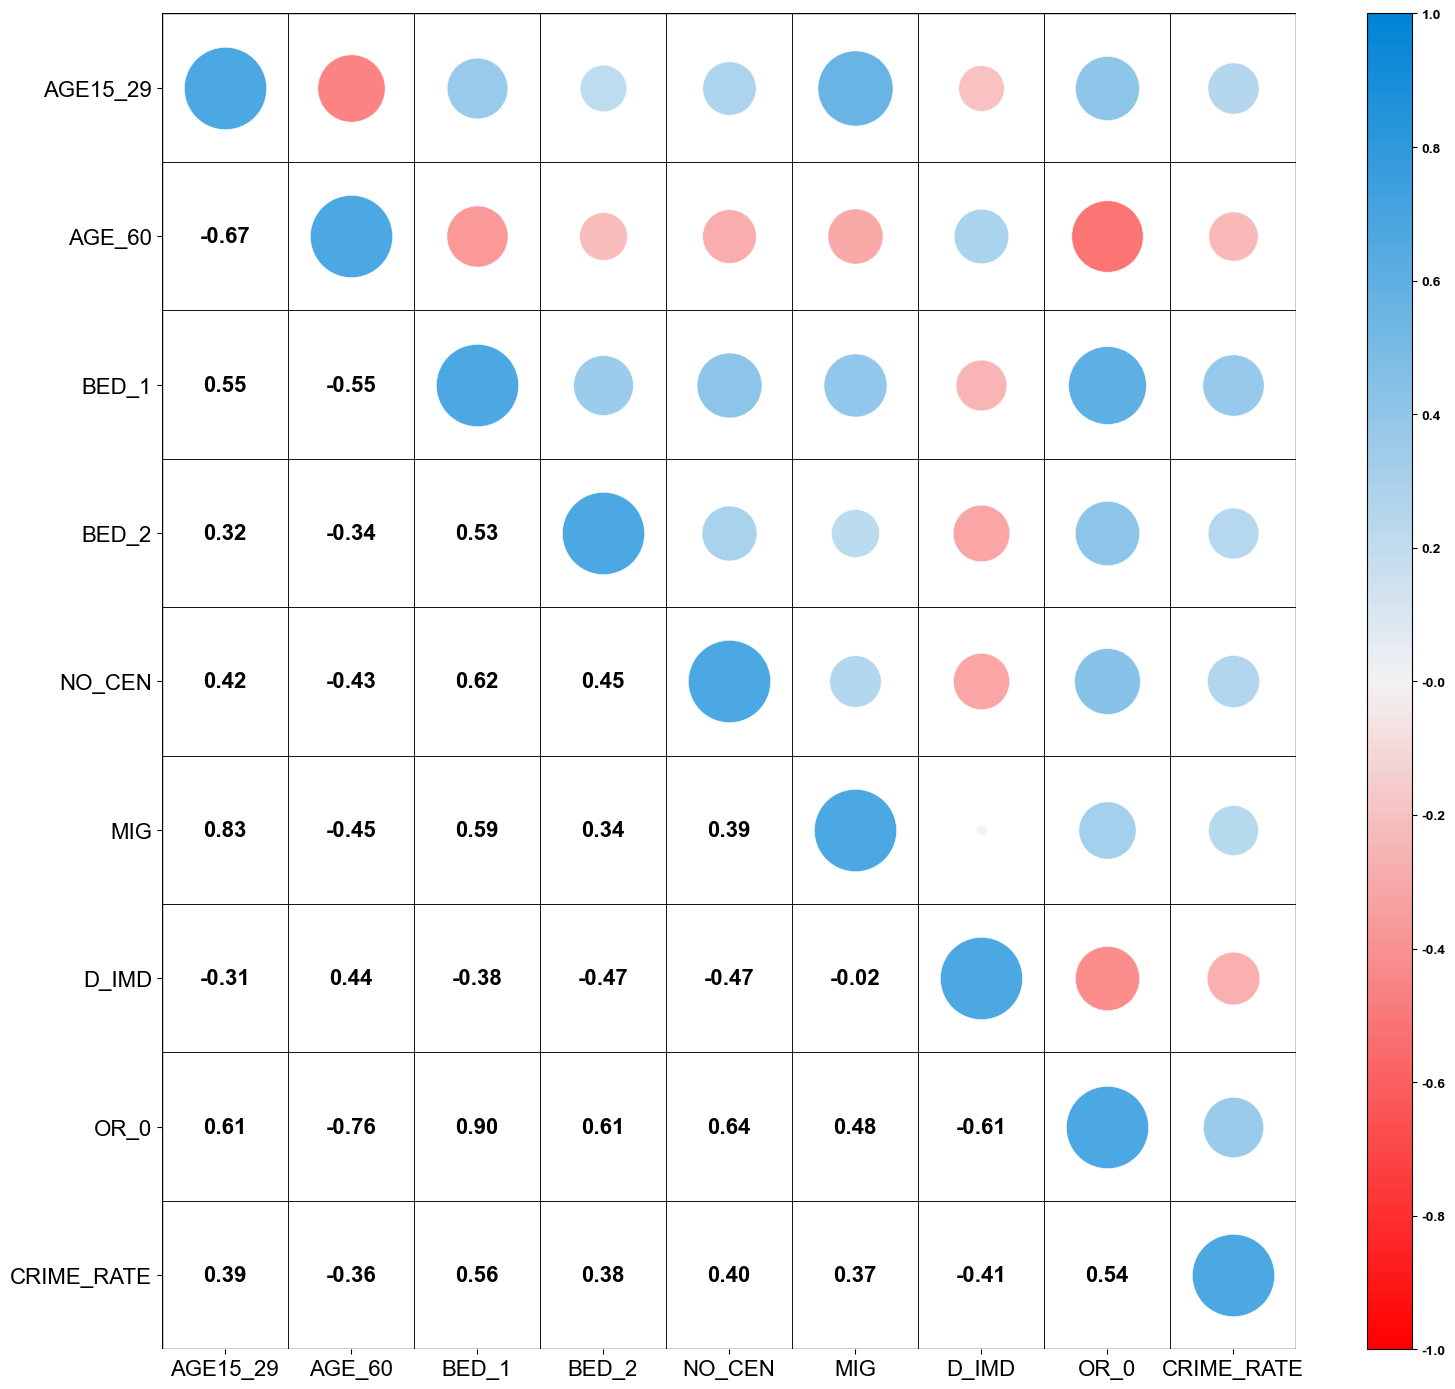

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 假设 data 已经定义好

# 定义变量和对应的缩写（全部大写）
variable_mapping = {
    'Aged 15 to 29 years': 'AGE15_29',
    'Aged 60 years and over': 'AGE_60',
    '1 bedroom': 'BED_1',
    '2 bedrooms': 'BED_2',
    'No central heating': 'NO_CEN',
    'Migrant from within or outside the UK': 'MIG',
    'MSOADECILE': 'D_IMD',
    'Occupancy rating of 0': 'OR_0',
    'crime_rate': 'CRIME_RATE'  # 将 crime_rate 改为大写
}

# 使用缩写重命名列
data = data.rename(columns=variable_mapping)
selected_vars = list(variable_mapping.values())

# 计算相关性矩阵
corr_matrix = data[selected_vars].corr()

# 设置Arial字体
plt.rcParams['font.family'] = 'Arial'

# 设置图形大小和样式
fig, ax = plt.subplots(figsize=(16, 14))
plt.rcParams['axes.facecolor'] = 'white'

# 创建自定义颜色映射
cmap = sns.diverging_palette(10, 240, s=150, as_cmap=True)

# 绘制相关性矩阵
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        corr_value = corr_matrix.iloc[i, j]
        color = cmap((corr_value + 1) / 2)
        
        # 为每个格子绘制边框
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='Black', lw=0.5))
        
        if i <= j:  # 上三角和对角线：画圆点
            size = 3500 * abs(corr_value)
            ax.scatter(j + 0.5, i + 0.5, s=size, c=[color], edgecolors='white', linewidth=0.5, alpha=0.7)
        if i > j:  # 下三角：显示数字
            ax.text(j + 0.5, i + 0.5, f'{corr_value:.2f}', ha='center', va='center', fontsize=16, fontweight='bold')

# 设置轴标签和刻度
ax.set_xlim(0, len(corr_matrix))
ax.set_ylim(len(corr_matrix), 0)
ax.set_xticks(np.arange(len(corr_matrix)) + 0.5)
ax.set_yticks(np.arange(len(corr_matrix)) + 0.5)
ax.set_xticklabels(selected_vars, rotation=0, ha='center', va='top', fontsize=16)
ax.set_yticklabels(selected_vars, fontsize=16)

# 添加外边框
ax.add_patch(plt.Rectangle((0, 0), len(corr_matrix), len(corr_matrix), fill=False, edgecolor='Black', lw=1))

# 移除轴线
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-1, vmax=1))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, aspect=30)
cbar.set_ticks(np.arange(-1, 1.2, 0.2))
cbar.set_ticklabels([f'{i:.1f}' for i in np.arange(-1, 1.2, 0.2)])
cbar.ax.tick_params(labelsize=10)
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')

# 调整布局
plt.tight_layout()

# 导出图像，设置dpi为600
plt.savefig('correlation_matrix.png', dpi=600, bbox_inches='tight')

# 显示图形
plt.show()

In [214]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [215]:
import statsmodels.api as sm
import pandas as pd

# Create final_data with selected variables
final_data = data[selected_vars]  # 不需要再添加 'crime_rate'，因为它已经在 selected_vars 中了

# Filter out variables with VIF > 5 using the custom function
final_data_vif_filtered = drop_column_using_vif_(final_data.drop(columns=['CRIME_RATE']), thresh=5)

# Prepare the final dataset for regression
selected_vars_vif = final_data_vif_filtered.columns.tolist()
selected_vars_with_crime = ['CRIME_RATE'] + selected_vars_vif

# Display the selected variables
print(selected_vars_with_crime)

Max VIF: 23.067873987034485
Dropping: OR_0
Max VIF: 6.828472780429881
Dropping: AGE15_29
Max VIF: 2.533318335199289
['CRIME_RATE', 'AGE_60', 'BED_1', 'BED_2', 'NO_CEN', 'MIG', 'D_IMD']


In [216]:
# Perform linear regression using the selected variables
X = data[selected_vars_vif]
y = data['CRIME_RATE']

In [217]:
import statsmodels.api as sm
import pandas as pd
from tabulate import tabulate
from termcolor import colored

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out=0.05, 
                       verbose=True):
    included = list(initial_list)
    step_number = 0

    def print_status():
        excluded = list(set(X.columns) - set(included))
        print(colored("\n当前状态:", "cyan"))
        print(colored(f"  保留的变量: {included}", "green"))
        print(colored(f"  未被选入的变量: {excluded}", "yellow"))

    while True:
        changed = False
        step_number += 1

        # 前向步骤
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if verbose:
            print(colored(f'\n步骤 {step_number} - 前向选择:', 'cyan'))
            print(tabulate(new_pval.reset_index().rename(columns={0: 'p-value'}), 
                           headers=['特征', 'p-值'], 
                           tablefmt='pretty', 
                           floatfmt='.6f'))
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(colored(f'添加特征: {best_feature} (p-值: {best_pval:.6f})', 'green'))
                print_status()
        
        # 后向步骤
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if verbose:
            print(colored(f'\n步骤 {step_number} - 后向消除:', 'cyan'))
            print(tabulate(pvalues.reset_index().rename(columns={0: 'p-value'}), 
                           headers=['特征', 'p-值'], 
                           tablefmt='pretty', 
                           floatfmt='.6f'))
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(colored(f'移除特征: {worst_feature} (p-值: {worst_pval:.6f})', 'red'))
                print_status()
        if not changed:
            break
    return included

# 使用双向逐步回归选择特征
selected_features = stepwise_selection(X, y, verbose=True)

# 打印最终结果
print(colored('\n最终结果:', 'magenta'))
print(colored('选入的特征:', 'green'))
for feature in selected_features:
    print(colored(f'  - {feature}', 'green'))

excluded_features = list(set(X.columns) - set(selected_features))
print(colored('\n未被选入的特征:', 'yellow'))
for feature in excluded_features:
    print(colored(f'  - {feature}', 'yellow'))

# 用选择的特征重新拟合模型
X_selected = X[selected_features]
X_selected = sm.add_constant(X_selected)
model_final = sm.OLS(y, X_selected).fit()

# 显示最终模型的摘要
print(colored('\n最终模型摘要:', 'magenta'))
print(model_final.summary())


步骤 1 - 前向选择:
+---+--------+-------------------------+
|   |  特征  |          p-值           |
+---+--------+-------------------------+
| 0 | AGE_60 | 3.7088009034296186e-206 |
| 1 | BED_2  | 8.096353102998376e-238  |
| 2 | NO_CEN | 6.295875410245827e-264  |
| 3 | D_IMD  | 1.0515061748495766e-277 |
| 4 |  MIG   | 2.0013120605470393e-220 |
| 5 | BED_1  |           0.0           |
+---+--------+-------------------------+
添加特征: BED_1 (p-值: 0.000000)

当前状态:
  保留的变量: ['BED_1']
  未被选入的变量: ['AGE_60', 'BED_2', 'NO_CEN', 'MIG', 'D_IMD']

步骤 1 - 后向消除:
+---+-------+------+
|   | 特征  | p-值 |
+---+-------+------+
| 0 | BED_1 | 0.0  |
+---+-------+------+

步骤 2 - 前向选择:
+---+--------+-------------------------+
|   |  特征  |          p-值           |
+---+--------+-------------------------+
| 0 | AGE_60 |  1.359646353764602e-09  |
| 1 | BED_2  | 2.0834676027736087e-25  |
| 2 | NO_CEN |  2.713173991418373e-12  |
| 3 |  MIG   | 1.5377951262138294e-07  |
| 4 | D_IMD  | 1.1234379727768712e-105 |
+---+--------

# 从这里开始

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
from pysal.lib import weights
from joblib import Parallel, delayed

In [103]:
# 读取geopackage文件中的msoa.shp
gdf = gpd.read_file('England_origin.gpkg', layer='msoa')

In [104]:
# 打印列名以确认它们
print(gdf.columns)

Index(['MSOA21CD', 'MSOA21NM', 'crime_rate', 'popudense',
       'Aged 15 to 29 years', 'Aged 30 to 59 years', 'Aged 60 years and over',
       '1 bedroom', '2 bedrooms', '3 bedrooms', 'No central heating',
       'Good health', 'Fair health', 'Bad health', 'Very bad health',
       'Part-time: 15 hours or less worked',
       'Part-time: 16 to 30 hours worked', 'Full-time: 31 to 48 hours worked',
       'Total annual income (£)', 'No qualifications',
       'Level 1 and entry level qualifications', 'Level 2 qualifications',
       'Apprenticeship', 'Level 3 qualifications', 'Other qualifications',
       'unemployment_rate', 'Migrant from within or outside the UK',
       'MSOADECILE', 'Occupancy rating of -1 or less', 'Occupancy rating of 0',
       'Occupancy rating of +1', 'geometry'],
      dtype='object')


原始数据

In [105]:
# 确保gdf中包含需要的变量和地理坐标
selected_vars_vif = [
  'Aged 60 years and over',
  'Migrant from within or outside the UK',
  'MSOADECILE',
  #'Occupancy rating of 0'
  '1 bedroom'
]

# 标准化选定的自变量
for col in selected_vars_vif:
    gdf[col] = (gdf[col] - gdf[col].mean()) / gdf[col].std()

# 标准化因变量
gdf['crime_rate'] = (gdf['crime_rate'] - gdf['crime_rate'].mean()) / gdf['crime_rate'].std()

# 提取自变量和因变量数据
X = gdf[selected_vars_vif].values
y = gdf['crime_rate'].values.reshape(-1, 1)

# 专门作图用的新gdf

In [165]:
# 读取geopackage文件中的msoa.shp
gdf_plot = gpd.read_file('England_draw.gpkg', layer='msoa')

In [59]:
# 读取 England_authorities.shp 文件
gdf_la = gpd.read_file('England_local_auth.shp')

In [60]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import mapclassify

C:\Users\Jax\AppData\Local\Temp\ipykernel_18624\2929179093.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


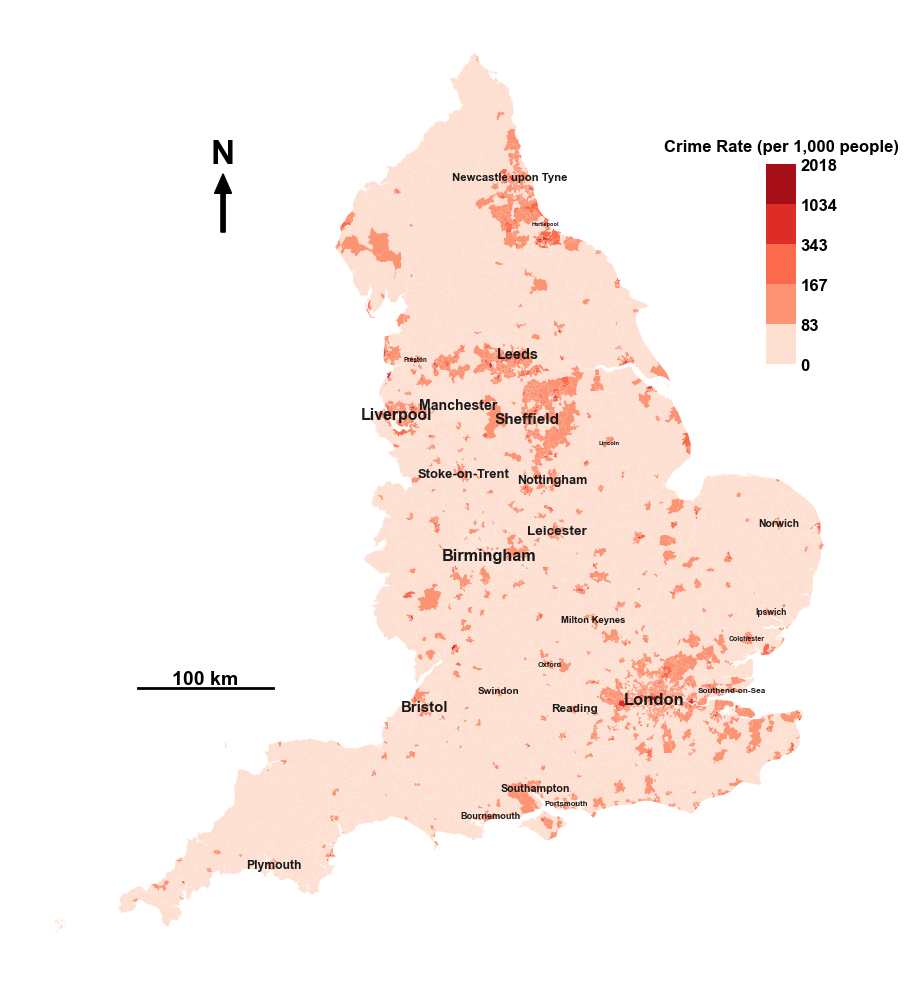

In [90]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import mapclassify
import geopandas as gpd
from matplotlib.patches import FancyArrow

# 设置Cambria字体
plt.rcParams['font.family'] = 'Arial'

# 读取Shapefile文件
gdfcity = gpd.read_file("England_cities.shp")

# 计算面积并排序
gdfcity['area'] = gdfcity.geometry.area
gdfcity_sorted = gdfcity.sort_values('area', ascending=False).reset_index(drop=True)

# 设置字体大小
def font_size(rank, total):
    return round(12 - (rank / (total - 1)) * 8, 1)

# 计算总城市数并为每个城市分配字体大小
total_cities = len(gdfcity_sorted)
gdfcity_sorted['font_size'] = gdfcity_sorted.index.map(lambda x: font_size(x, total_cities))

# 创建地理图
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# 使用 Jenks Natural Breaks 进行数据分类
classifier = mapclassify.NaturalBreaks(gdf_plot['crime_rate'], k=5)
breaks = classifier.bins.tolist()
breaks.insert(0, gdf_plot['crime_rate'].min())

# 使用提供的颜色方案
optimized_colors = ['#fee0d2', '#fc9272', '#fb6a4a', '#de2d26', '#a50f15']
cmap = mcolors.LinearSegmentedColormap.from_list("Custom", optimized_colors)
norm = mcolors.BoundaryNorm(breaks, cmap.N)

# 绘制主图
gdf_plot.plot(column='crime_rate', ax=ax, cmap=cmap, norm=norm, legend=False)

# 添加透明的边界线
gdf_plot.boundary.plot(ax=ax, edgecolor='none', linewidth=0.03)

# 添加城市名称
for idx, row in gdfcity_sorted.iterrows():
    ax.annotate(text=row['TCITY15NM'], 
                xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                fontsize=row['font_size'],
                ha='center',
                va='center',
                color='#1A1A1A',
                weight='bold')
    
ax.set_axis_off()

# 创建一个ScalarMappable对象用于颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# 添加颜色条到右下角
cax = fig.add_axes([0.72, 0.63, 0.02, 0.2])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
cbar.outline.set_visible(False)
cbar.ax.tick_params(size=0, labelsize=12, pad=3)

# 设置颜色条的刻度和标签
cbar.set_ticks(breaks)
cbar.set_ticklabels([f'{x:.0f}' for x in breaks])

# 将刻度标签设置为粗体
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')
    
# 添加顶部的 "Level" 标签
cax.text(0.5, 1.05, 'Crime Rate (per 1,000 people)', transform=cax.transAxes, ha='center', va='bottom', fontsize=12, fontweight='bold')

# 添加100公里的比例尺
scale_bar_length = 100000  # 100 km
x_scale = ax.get_xlim()[0] + 0.15 * (ax.get_xlim()[1] - ax.get_xlim()[0])
y_scale = ax.get_ylim()[0] + 0.3 * (ax.get_ylim()[1] - ax.get_ylim()[0])

# 绘制比例尺
ax.plot([x_scale, x_scale + scale_bar_length], [y_scale, y_scale], color='black', linewidth=2)
ax.text(x_scale + scale_bar_length/2, y_scale, '100 km', ha='center', va='bottom', fontsize=14, fontweight='bold')

# 添加指北针
arrow = FancyArrow(0.25, 0.77, 0, 0.04, width=0.005, head_width=0.02, head_length=0.02, fc='black', ec='black', transform=ax.transAxes)
ax.add_patch(arrow)
ax.text(0.25, 0.85, 'N', ha='center', va='center', fontsize=24, fontweight='bold', transform=ax.transAxes)

plt.tight_layout()

# 导出图像，设置dpi为600
plt.savefig('geographical_distribution_crime_rate_with_cities.png', dpi=600, bbox_inches='tight')
plt.show()

c:\Users\Jax\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


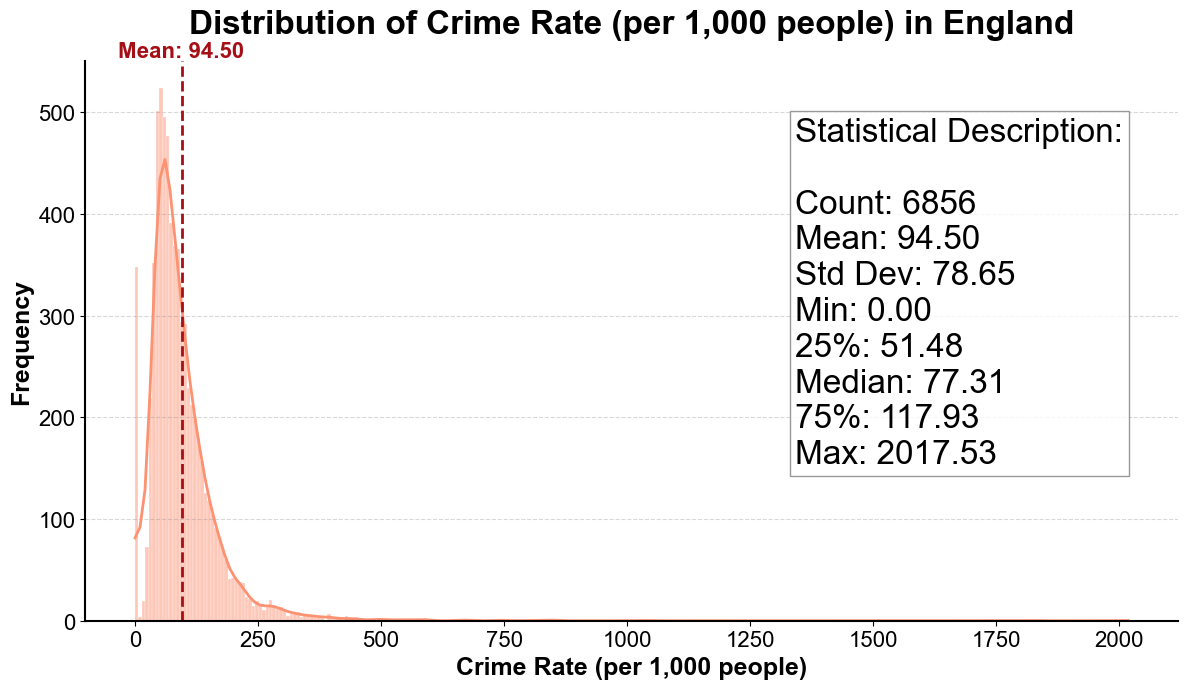

Statistical Description of Crime Rate:
count    6856.000000
mean       94.497948
std        78.653681
min         0.000000
25%        51.481847
50%        77.314248
75%       117.928093
max      2017.532874
Name: crime_rate, dtype: float64

Skewness: 6.07
Kurtosis: 99.25


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 设置字体
plt.rcParams['font.family'] = 'Arial'

# 创建图形
fig, ax = plt.subplots(figsize=(12, 7))

# 绘制直方图
sns.histplot(data=gdf_plot, x='crime_rate', kde=True, color='#fc9272', 
             edgecolor='white', line_kws={'linewidth': 2, 'color': '#de2d26'}, ax=ax)

# 设置标题和标签
ax.set_title('Distribution of Crime Rate (per 1,000 people) in England', 
             fontsize=24, fontweight='bold', pad=20)
ax.set_xlabel('Crime Rate (per 1,000 people)', fontsize=18, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=18, fontweight='bold')

# 调整刻度标签
ax.tick_params(axis='both', which='major', labelsize=16)

# 添加网格线
ax.grid(axis='y', linestyle='--', alpha=0.3, color='gray')

# 移除上边框和右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 加粗左边框和下边框
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# 添加平均值线
mean_crime = gdf_plot['crime_rate'].mean()
ax.axvline(mean_crime, color='#a50f15', linestyle='--', linewidth=2)
ax.text(mean_crime, ax.get_ylim()[1], f'Mean: {mean_crime:.2f}', 
        horizontalalignment='center', verticalalignment='bottom', 
        fontweight='bold', color='#a50f15', fontsize=16)

# 计算统计描述
stats = gdf_plot['crime_rate'].describe()

# 计算偏度和峰度
skewness = gdf_plot['crime_rate'].skew()
kurtosis = gdf_plot['crime_rate'].kurtosis()

# 创建统计信息文本
stats_text = (
    f"Statistical Description:\n\n"
    f"Count: {stats['count']:.0f}\n"
    f"Mean: {stats['mean']:.2f}\n"
    f"Std Dev: {stats['std']:.2f}\n"
    f"Min: {stats['min']:.2f}\n"
    f"25%: {stats['25%']:.2f}\n"
    f"Median: {stats['50%']:.2f}\n"
    f"75%: {stats['75%']:.2f}\n"
    f"Max: {stats['max']:.2f}"
)

# 添加统计信息到图中的右上角
plt.text(0.65, 0.90, stats_text, transform=ax.transAxes, fontsize=24,
         verticalalignment='top', horizontalalignment='left',
         bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8))

# 调整布局
plt.tight_layout()

# 保存图形
plt.savefig('crime_rate_distribution_histogram_with_embedded_stats.png', dpi=600, bbox_inches='tight')
plt.show()

# 打印统计描述（可选，如果您仍然想在控制台看到）
print("Statistical Description of Crime Rate:")
print(stats)
print(f"\nSkewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

In [6]:
# 确保gdf中包含需要的变量和地理坐标
selected_vars_vif = [
  'Aged 60 years and over',
  'Migrant from within or outside the UK',
  'MSOADECILE',
  #'Occupancy rating of 0'
  '1 bedroom'
]

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import mapclassify
import geopandas as gpd
import seaborn as sns

# 设置Arial字体
plt.rcParams['font.family'] = 'Arial'

# 定义颜色方案
optimized_colors = ['#fee0d2', '#fc9272', '#fb6a4a', '#de2d26', '#a50f15']

# 定义新的标题映射
title_mapping = {
    'Aged 60 years and over': 'Aged 60 years and over %',
    'Migrant from within or outside the UK': 'Migrant %',
    'MSOADECILE': 'Decile of Index of Multiple Deprivation',
    '1 bedroom': '1 bedroom %'
}

for var in selected_vars_vif:
    # 创建一个包含两个子图的图表
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    # 使用映射后的标题
    mapped_title = title_mapping.get(var, var)
    
    # 地理分布图 (左侧)
    classifier = mapclassify.NaturalBreaks(gdf_plot[var], k=5)
    breaks = classifier.bins.tolist()
    breaks.insert(0, gdf_plot[var].min())
    
    cmap = mcolors.LinearSegmentedColormap.from_list("Custom", optimized_colors)
    norm = mcolors.BoundaryNorm(breaks, cmap.N)
    
    gdf_plot.plot(column=var, ax=ax1, cmap=cmap, norm=norm, legend=False)
    gdf_plot.boundary.plot(ax=ax1, edgecolor='none', linewidth=0.03)
    
    ax1.set_title(f'Geographical Distribution of {mapped_title}', fontsize=16, fontweight='bold')
    ax1.set_axis_off()
    
    # 添加颜色条
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax)
    cbar.outline.set_visible(False)
    cbar.ax.tick_params(size=0, labelsize=16, pad=3)  # 更改字体大小为16
    cbar.set_ticks(breaks)
    cbar.set_ticklabels([f'{x:.2f}' for x in breaks])
    for label in cbar.ax.get_yticklabels():
        label.set_fontweight('bold')
    
    # 分布图 (右侧)
    sns.histplot(data=gdf_plot, x=var, kde=True, color='#fc9272', 
                 edgecolor='white', line_kws={'linewidth': 2, 'color': '#de2d26'}, ax=ax2)
    
    ax2.set_title(f'Distribution of {mapped_title}', fontsize=16, fontweight='bold', pad=20)
    ax2.set_xlabel(mapped_title, fontsize=14, fontweight='bold')
    ax2.set_ylabel('Frequency', fontsize=14, fontweight='bold')
    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.grid(axis='y', linestyle='--', alpha=0.3, color='gray')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_linewidth(1.5)
    ax2.spines['bottom'].set_linewidth(1.5)
    
    # 添加平均值线
    mean_value = gdf_plot[var].mean()
    ax2.axvline(mean_value, color='#a50f15', linestyle='--', linewidth=2)
    ax2.text(mean_value, ax2.get_ylim()[1], f'Mean: {mean_value:.2f}', 
             horizontalalignment='center', verticalalignment='bottom', 
             fontweight='bold', color='#a50f15', fontsize=12)
    
    # 调整布局并保存图像
    plt.tight_layout()
    plt.savefig(f'{var.replace(" ", "_")}_analysis.png', dpi=600, bbox_inches='tight')
    plt.close()  # 关闭图形，避免在notebook中显示

print("All images have been generated and saved.")

c:\Users\Jax\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jax\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jax\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jax\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

All images have been generated and saved.


In [170]:
import pandas as pd
import numpy as np

# 创建一个空的DataFrame来存储所有变量的统计信息
stats_df = pd.DataFrame()

for var in selected_vars_vif:
    # 计算描述性统计
    stats = gdf_plot[var].describe()
    
    # 计算偏度和峰度
    skewness = gdf_plot[var].skew()
    kurtosis = gdf_plot[var].kurtosis()
    
    # 创建一个Series来存储这个变量的所有统计信息
    var_stats = pd.Series({
        'Count': stats['count'],
        'Mean': stats['mean'],
        'Std Dev': stats['std'],
        'Min': stats['min'],
        '25%': stats['25%'],
        'Median': stats['50%'],
        '75%': stats['75%'],
        'Max': stats['max'],
        'Skewness': skewness,
        'Kurtosis': kurtosis
    })
    
    # 将这个变量的统计信息添加到DataFrame中
    stats_df[var] = var_stats

# 转置DataFrame以使变量名称成为列
stats_df = stats_df.T

# 打印统计信息
print(stats_df.to_string(float_format='{:.2f}'.format))

# 如果你想保存这些统计信息到CSV文件
stats_df.to_csv('variable_statistics.csv')

                                        Count  Mean  Std Dev  Min   25%  Median   75%   Max  Skewness  Kurtosis
Aged 60 years and over                6856.00 24.76     8.39 1.90 18.60   24.80 30.60 61.20      0.17     -0.10
Migrant from within or outside the UK 6856.00 10.27     5.14 3.70  7.60    8.90 10.80 58.10      3.50     17.11
MSOADECILE                            6856.00  5.49     2.87 1.00  3.00    5.00  8.00 10.00      0.00     -1.22
1 bedroom                             6856.00 11.27     8.39 0.40  5.50    8.70 14.30 59.00      1.66      2.98


## Weight Matrix

In [5]:
# 创建Queen's Contiguity权重矩阵
w = weights.Queen.from_dataframe(gdf)

C:\Users\Jax\AppData\Local\Temp\ipykernel_18624\1153715837.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(gdf)
c:\Users\Jax\anaconda3\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There is 1 island with id: 6530.
  W.__init__(self, neighbors, ids=ids, **kw)


PySAL库在内部使用稀疏矩阵表示来处理空间权重。当我们创建Queen's Contiguity权重矩阵时（w = weights.Queen.from_dataframe(gdf)），PySAL默认使用稀疏矩阵格式来存储这些权重。这对于处理大型空间数据集特别有效，因为大多数地理单元只与少数邻近单元相邻，导致权重矩阵中大部分元素为零。

# Income spatial autocorrelatioin

In [8]:
# 读取geopackage文件中的msoa.shp
gdf_income = gpd.read_file('income.gpkg', layer='income')

In [106]:
from esda import Moran

# 确保 y 变量在 gdf 中
gdf_income['income'] = y

# 计算莫兰指数
moran_income = Moran(gdf_income['income'], w)

# 输出空间自相关分析结果
print("犯罪率的空间自相关分析结果：")
print(f"莫兰指数 (Moran's I): {moran_income.I:.4f}")
print(f"z-score: {moran_income.z_sim:.4f}")
print(f"p-value: {moran_income.p_sim:.4f}")

NameError: name 'gdf_income' is not defined

# Spatial Regression

貌似不需要行标准化了

In [6]:
from libpysal import weights

# 将权重矩阵转换为行标准化的稀疏矩阵
w.transform = 'r'

('WARNING: ', 6530, ' is an island (no neighbors)')


## 检查犯罪率的空间自相关

In [107]:
from esda import Moran

# 确保 y 变量在 gdf 中
gdf['crime_rate'] = y

# 计算莫兰指数
moran = Moran(gdf['crime_rate'], w)

# 输出空间自相关分析结果
print("犯罪率的空间自相关分析结果：")
print(f"莫兰指数 (Moran's I): {moran.I:.4f}")
print(f"z-score: {moran.z_sim:.4f}")
print(f"p-value: {moran.p_sim:.4f}")

犯罪率的空间自相关分析结果：
莫兰指数 (Moran's I): 0.4825
z-score: 70.7151
p-value: 0.0010


# OLS，包括空间诊断

In [94]:
# w.transform = 'r'  # 行标准化

In [108]:
from libpysal import weights
from spreg import OLS

# 假设 w 是您已经定义的空间权重矩阵

# 运行OLS回归，并要求进行空间诊断
ols = OLS(y, X, w=w, name_y='crime_rate', name_x=selected_vars_vif, spat_diag=True)

# 打印OLS回归结果，包括空间诊断
print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :  crime_rate                Number of Observations:        6856
Mean dependent var  :      0.0000                Number of Variables   :           5
S.D. dependent var  :      1.0000                Degrees of Freedom    :        6851
R-squared           :      0.3703
Adjusted R-squared  :      0.3699
Sum squared residual:      4316.5                F-statistic           :   1007.2566
Sigma-square        :       0.630                Prob(F-statistic)     :           0
S.E. of regression  :       0.794                Log likelihood        :   -8142.176
Sigma-square ML     :       0.630                Akaike info criterion :   16294.352
S.E of regression ML:      0.7935                Schwarz criterion     :   16328.516

------------------------------------------------------------

残差的空间自相关

In [109]:
# 计算 Moran's I
moran = Moran(ols.u, w, two_tailed=True)  # ols.u 是OLS模型的残差

print(f"残差的莫兰指数 (Moran's I): {moran.I:.4f}")
print(f"z-score: {moran.z_norm:.4f}")

print("\nP 值 (正态性假设):")
print(f"{moran.p_norm:.5f}")

print("\nP 值 (置换法):")
print(f"{moran.p_sim:.5f}")

print("\nP 值 (随机化假设):")
print(f"{moran.p_rand:.5f}")

残差的莫兰指数 (Moran's I): 0.4727
z-score: 63.5040

P 值 (正态性假设):
0.00000

P 值 (置换法):
0.00100

P 值 (随机化假设):
0.00000


# SEM

In [10]:
from libpysal import weights
from spreg import ML_Error

# 假设 w 是您已经定义的空间权重矩阵

# 运行空间误差模型
error_model = ML_Error(y, X, w=w, name_y='crime_rate', name_x=selected_vars_vif)

# 打印模型结果
print(error_model.summary)

c:\Users\Jax\anaconda3\Lib\site-packages\scipy\optimize\_minimize.py:913: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :  crime_rate                Number of Observations:        6856
Mean dependent var  :      0.0000                Number of Variables   :           5
S.D. dependent var  :      1.0000                Degrees of Freedom    :        6851
Pseudo R-squared    :      0.3674
Log likelihood      :  -6672.0396
Sigma-square ML     :      0.3640                Akaike info criterion :   13354.079
S.E of regression   :      0.6034                Schwarz criterion     :   13388.244

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        -0.03185    

In [110]:
# 1. 获取残差
residualsem = error_model.u

# 计算 Moran's I
moransem = Moran(residualsem, w, two_tailed=True) 

print(f"残差的莫兰指数 (Moran's I): {moransem.I:.4f}")
print(f"z-score: {moransem.z_norm:.4f}")

print("\nP 值 (正态性假设):")
print(f"{moransem.p_norm:.5f}")

print("\nP 值 (置换法):")
print(f"{moransem.p_sim:.5f}")

print("\nP 值 (随机化假设):")
print(f"{moransem.p_rand:.5f}")

残差的莫兰指数 (Moran's I): 0.4807
z-score: 64.5751

P 值 (正态性假设):
0.00000

P 值 (置换法):
0.00100

P 值 (随机化假设):
0.00000


# SLM

In [113]:
from spreg import ML_Lag

# 创建空间滞后模型
model = ML_Lag(y, X, w, name_y='crime_rate', name_x=selected_vars_vif)

# 查看模型结果摘要
print(model.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :  crime_rate                Number of Observations:        6856
Mean dependent var  :      0.0000                Number of Variables   :           6
S.D. dependent var  :      1.0000                Degrees of Freedom    :        6850
Pseudo R-squared    :      0.5674
Spatial Pseudo R-squared:  0.3075
Log likelihood      :  -7111.9918
Sigma-square ML     :      0.4350                Akaike info criterion :   14235.984
S.E of regression   :      0.6596                Schwarz criterion     :   14276.981

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [117]:
lag_residuals = model.u

# 计算 Moran's I
moranslm = Moran(lag_residuals, w, two_tailed=True) 

print(f"残差的莫兰指数 (Moran's I): {moranslm.I:.4f}")
print(f"z-score: {moranslm.z_norm:.4f}")

print("\nP 值 (正态性假设):")
print(f"{moranslm.p_norm:.5f}")

print("\nP 值 (置换法):")
print(f"{moranslm.p_sim:.5f}")

print("\nP 值 (随机化假设):")
print(f"{moranslm.p_rand:.5f}")

残差的莫兰指数 (Moran's I): 0.0901
z-score: 12.1226

P 值 (正态性假设):
0.00000

P 值 (置换法):
0.00100

P 值 (随机化假设):
0.00000


# GWR

In [14]:
# 计算每个多边形的质心坐标，用于GWR分析
coords = np.array([gdf.geometry.centroid.x, gdf.geometry.centroid.y]).T


In [15]:
# 选择带宽
selector = Sel_BW(coords, y, X)
opt_bw = selector.search()

In [118]:
# 进行GWR分析
gwr_model = GWR(coords, y, X, bw=opt_bw, fixed=False, spherical=False)
gwr_results = gwr_model.fit()

# 打印结果
print(gwr_results.summary())

Model type                                                         Gaussian
Number of observations:                                                6856
Number of covariates:                                                     5

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           4316.497
Log-likelihood:                                                   -8142.176
AIC:                                                              16294.352
AICc:                                                             16296.364
BIC:                                                             -56197.560
R2:                                                                   0.370
Adj. R2:                                                              0.370

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

## GWR Residuals

In [120]:
# 将结果加入GeoDataFrame
gdf['gwr_intercept'] = gwr_results.params[:, 0]
for i, var in enumerate(selected_vars_vif):
    gdf[f'gwr_{var}'] = gwr_results.params[:, i + 1]

# 添加残差到GeoDataFrame
gdf['gwr_residuals'] = gwr_results.resid_response

# 将结果保存为GeoJSON文件
# gdf.to_file('gwr_results.geojson', driver='GeoJSON')

## Moran's I

In [130]:
from pysal.explore import esda

morangwr = esda.Moran(gdf['gwr_residuals'], w)
print(f"Moran's I: {morangwr.I:.4f}")
print(f"z-score: {morangwr.z_sim:.4f}")
print(f"p-value: {morangwr.p_sim:.4f}")

Moran's I: 0.0449
z-score: 5.8897
p-value: 0.0020


In [122]:
# 计算 Moran's I
morangwr = Moran(gdf['gwr_residuals'], w, two_tailed=True)

print(f"残差的莫兰指数 (Moran's I): {morangwr.I:.4f}")
print(f"z-score: {morangwr.z_norm:.4f}")

print("\nP 值 (正态性假设):")
print(f"{morangwr.p_norm:.5f}")

print("\nP 值 (置换法):")
print(f"{morangwr.p_sim:.5f}")

print("\nP 值 (随机化假设):")
print(f"{morangwr.p_rand:.5f}")

残差的莫兰指数 (Moran's I): 0.0449
z-score: 6.0482

P 值 (正态性假设):
0.00000

P 值 (置换法):
0.00100

P 值 (随机化假设):
0.00000


### KNN Moran's I

In [31]:
# 创建一个KNN权重矩阵，假设K=4
k = 4
w_knn = weights.KNN.from_dataframe(gdf, k=k)

In [35]:
moran_knn = esda.Moran(gdf['gwr_residuals'], w_knn)
print(f"KNN Moran's I: {moran_knn.I:.4f}")
print(f"KNN p-value: {moran_knn.p_sim:.4f}")

KNN Moran's I: 0.0739
KNN p-value: 0.0010


## GWR Results

In [5]:
selected_vars_vif

['AGE_60', 'BED_1', 'BED_2', 'NO_CEN', 'MIG', 'D_IMD']

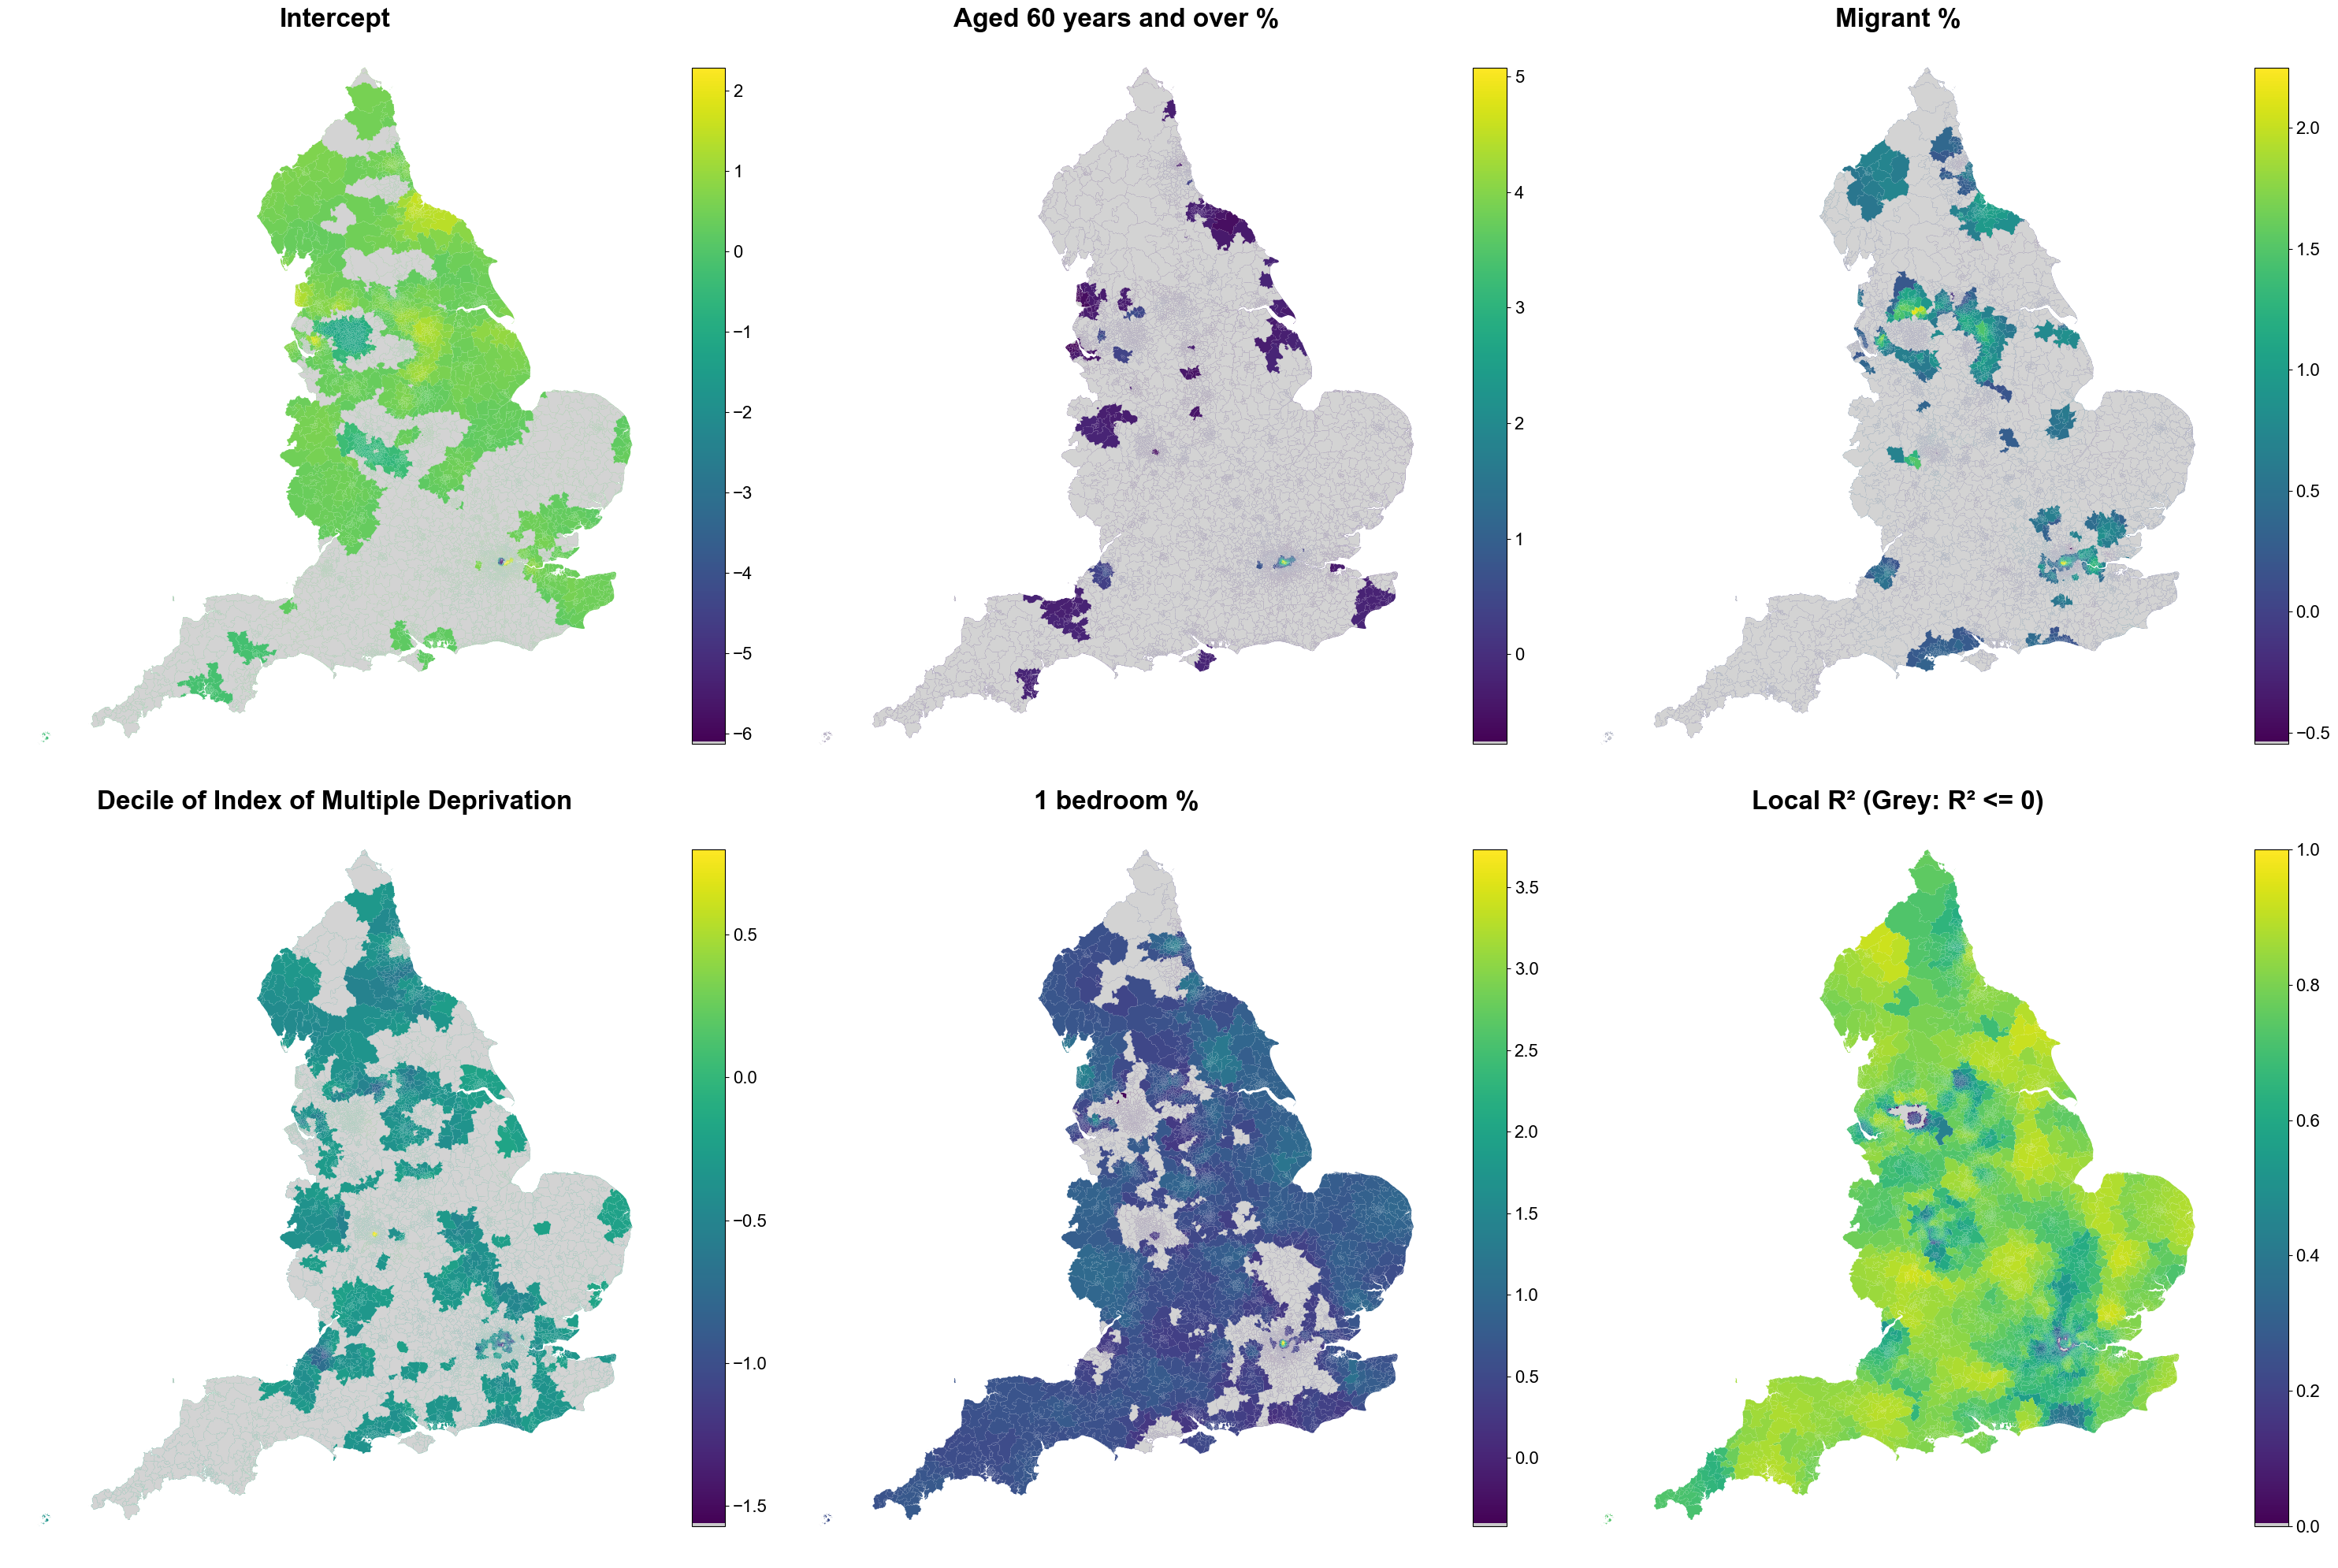

Local R² - Mean: 0.4701, Min: -223.5951, Max: 0.9288
Number of areas with R² <= 0: 158


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.font_manager as fm

# 设置全局字体为Arial
plt.rcParams['font.family'] = 'Arial'

# 假设 gdf, gwr_results, selected_vars_vif 已经定义

# 添加局部 R² 到 GeoDataFrame
gdf['local_r2'] = gwr_results.localR2

# 计算标准误差和显著性
t_values = gwr_results.tvalues
for i, var in enumerate(['Intercept'] + selected_vars_vif):
    col_name = var if var == 'Intercept' else f'gwr_{var}'
    gdf[col_name] = gwr_results.params[:, i]
    gdf[f'se_{col_name}'] = gdf[col_name] / t_values[:, i]
    gdf[f'sig_{col_name}'] = np.abs(t_values[:, i]) > 1.96

# 创建自定义颜色映射
def create_custom_cmap(cmap_name='viridis'):
    cmap = plt.get_cmap(cmap_name)
    colors = cmap(np.linspace(0, 1, 256))
    colors[:1, :] = [0.8, 0.8, 0.8, 1]
    return LinearSegmentedColormap.from_list(f"custom_{cmap_name}", colors)

# 创建2x3的图
fig, axes = plt.subplots(2, 3, figsize=(30, 20))
axes = axes.flatten()

# 变量列表，包括Intercept, 4个选定的变量, 和local_r2
vars_to_plot = ['Intercept'] + selected_vars_vif + ['local_r2']

# 定义新的标题映射
title_mapping = {
    'Intercept': 'Intercept',
    'Aged 60 years and over': 'Aged 60 years and over %',
    'Migrant from within or outside the UK': 'Migrant %',
    'MSOADECILE': 'Decile of Index of Multiple Deprivation',
    '1 bedroom': '1 bedroom %',
    'local_r2': 'Local R² (Grey: R² <= 0)'
}

for i, var in enumerate(vars_to_plot):
    ax = axes[i]
    
    # 创建自定义颜色映射
    custom_cmap = create_custom_cmap()
    
    if var == 'local_r2':
        # 处理局部R²
        gdf['local_r2_clipped'] = np.clip(gdf['local_r2'], 0, 1)
        gdf.plot(column='local_r2_clipped', ax=ax, cmap=custom_cmap, legend=False, vmin=0, vmax=1)
        vmin, vmax = 0, 1
    else:
        # 处理其他变量
        col_name = var if var == 'Intercept' else f'gwr_{var}'
        mask = gdf[f'sig_{col_name}']
        gdf.plot(column=col_name, ax=ax, cmap=custom_cmap, legend=False)
        vmin, vmax = gdf[col_name].min(), gdf[col_name].max()
    
    # 绘制不显著或R²<=0的区域
    if var == 'local_r2':
        gdf[gdf['local_r2'] <= 0].plot(ax=ax, color='lightgrey', edgecolor='none')
    else:
        gdf[~mask].plot(ax=ax, color='lightgrey', edgecolor='none')
    
    ax.set_title(title_mapping[var], fontsize=24, fontweight='bold', fontfamily='Arial')  # 设置标题字体
    ax.axis('off')  # 移除坐标轴
    
    # 添加颜色条，但不添加标签
    sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []  # 空数组，用于欺骗colorbar
    cbar = fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('')  # 移除颜色条标签
    cbar.ax.tick_params(labelsize=16)  # 设置颜色条刻度标签的字体大小为16

plt.tight_layout()
plt.savefig('gwr_results.png', dpi=600, bbox_inches='tight')
plt.show()

# 打印统计信息
print(f"Local R² - Mean: {gdf['local_r2'].mean():.4f}, Min: {gdf['local_r2'].min():.4f}, Max: {gdf['local_r2'].max():.4f}")
print(f"Number of areas with R² <= 0: {(gdf['local_r2'] <= 0).sum()}")

### 保存所有变量

In [218]:
import pickle
import sys

def can_pickle(obj):
    try:
        pickle.dumps(obj)
        return True
    except:
        return False

# 获取当前模块的所有变量
current_module = sys.modules[__name__]
all_variables = {name: value for name, value in current_module.__dict__.items() 
                 if not name.startswith('_') and can_pickle(value)}

# 保存所有可序列化的变量到文件
with open('vscode_notebook_variables.pkl', 'wb') as f:
    pickle.dump(all_variables, f)

print(f"成功保存了 {len(all_variables)} 个变量到 'vscode_notebook_variables.pkl'")

成功保存了 138 个变量到 'vscode_notebook_variables.pkl'


### 加载所有变量

In [1]:
import pickle

# 自定义Unpickler类
class MyUnpickler(pickle.Unpickler):
    def find_class(self, module, name):
        # 如果遇到未知类或函数，可以返回一个占位符或其他处理方式
        try:
            return super().find_class(module, name)
        except AttributeError:
            print(f"无法找到类或函数 {name}，使用占位符处理。")
            return lambda *args, **kwargs: None

# 定义pkl文件的路径
file_path = 'vscode_notebook_variables.pkl'

# 打开并读取pkl文件
with open(file_path, 'rb') as file:
    data = MyUnpickler(file).load()

# 输出读取的数据
print(f"成功加载了 {len(data)} 个变量")

# 将字典中的变量解包到当前命名空间
globals().update(data)

# 检查其中一个变量（根据你的数据调整名称）
# print(variable_name)  # 替换为你的一个变量名，检查是否加载成功


无法找到类或函数 create_custom_cmap，使用占位符处理。
无法找到类或函数 font_size，使用占位符处理。
无法找到类或函数 can_pickle，使用占位符处理。
无法找到类或函数 drop_column_using_vif_，使用占位符处理。
无法找到类或函数 stepwise_selection，使用占位符处理。
无法找到类或函数 plot_local_r2，使用占位符处理。
无法找到类或函数 plot_coefficient_map，使用占位符处理。
无法找到类或函数 corr_with_pvalue，使用占位符处理。
成功加载了 138 个变量


# MGWR

In [18]:
# 导入必要的类
from mgwr.sel_bw import Sel_BW
from mgwr.gwr import MGWR

In [19]:
# 选择带宽用于MGWR
mgwr_selector = Sel_BW(coords, y, X, multi=True)
mgwr_bw = mgwr_selector.search()

Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

In [20]:
df_bandwidth = pd.DataFrame({'var' : ['Intercept'] + selected_vars_vif, 'bandwidth' : mgwr_bw.tolist()})
display(df_bandwidth)

var  bandwidth
0                              Intercept       61.0
1                 Aged 60 years and over      298.0
2  Migrant from within or outside the UK       54.0
3                             MSOADECILE     1409.0
4                              1 bedroom       43.0

In [21]:
# 进行MGWR分析
mgwr_model = MGWR(coords, y, X, selector=mgwr_selector)
mgwr_results = mgwr_model.fit()

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [102]:
# 打印结果
print(mgwr_results.summary())

Model type                                                         Gaussian
Number of observations:                                                6856
Number of covariates:                                                     5

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           4316.497
Log-likelihood:                                                   -8142.176
AIC:                                                              16294.352
AICc:                                                             16296.364
BIC:                                                             -56197.560
R2:                                                                   0.370
Adj. R2:                                                              0.370

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [133]:
# 将结果加入GeoDataFrame
gdf['mgwr_intercept'] = mgwr_results.params[:, 0]
for i, var in enumerate(selected_vars_vif):
    gdf[f'mgwr_{var}'] = mgwr_results.params[:, i + 1]

C:\Users\Jax\AppData\Local\Temp\ipykernel_18624\554596843.py:51: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf[~mask].plot(ax=ax, color='lightgrey', legend=False)


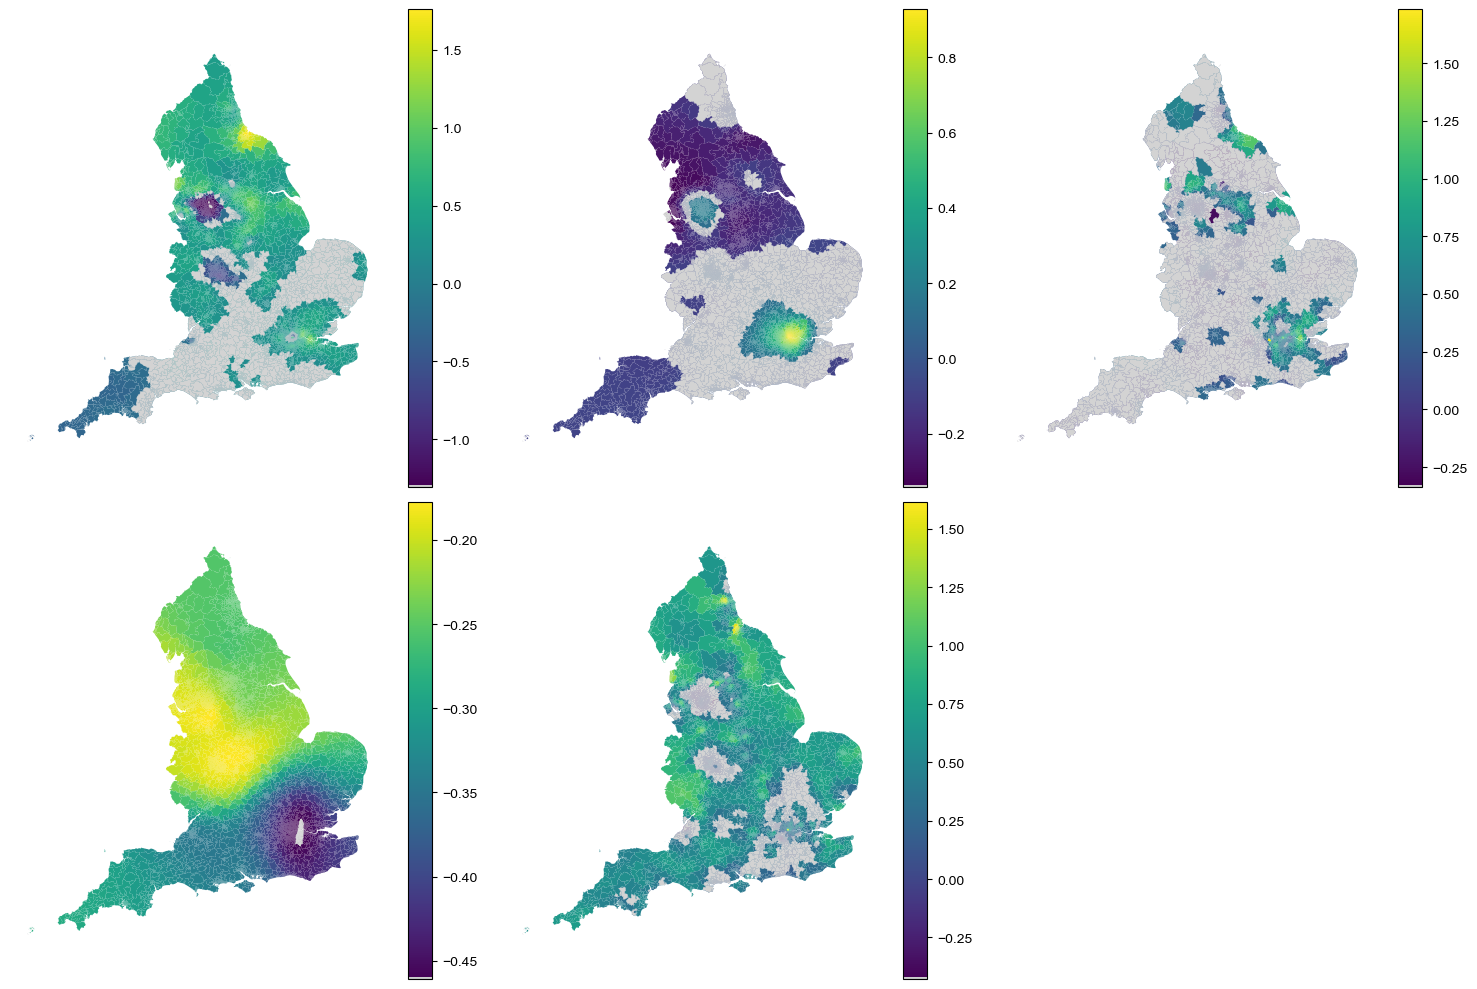

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 计算标准误差和t值
mgwr_t_values = mgwr_results.tvalues

# 设置Cambria字体
plt.rcParams['font.family'] = 'Arial'

# 计算显著性 (p < 0.05)
for i, var in enumerate(selected_vars_vif):
    gdf[f'sig_mgwr_{var}'] = np.abs(mgwr_t_values[:, i + 1]) > 1.96  # 使用1.96作为t值的临界值，对应于p<0.05

# 变量列表，包括截距
vars_to_plot = ['mgwr_intercept'] + [f'mgwr_{var}' for var in selected_vars_vif]

# 创建一个自定义的颜色映射，将不显著的值设为灰色
def create_custom_cmap(cmap_name='viridis'):
    cmap = plt.get_cmap(cmap_name)
    colors = cmap(np.linspace(0, 1, 256))
    colors[:1, :] = [0.8, 0.8, 0.8, 1]  # 将最低值设为灰色
    return LinearSegmentedColormap.from_list(f"custom_{cmap_name}", colors)

# 计算所需的行数和列数
n_plots = len(vars_to_plot)
n_cols = 3  # 每行3列
n_rows = (n_plots + n_cols - 1) // n_cols  # 向上取整

# 创建子图
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

# 绘制每个变量的结果
for i, var in enumerate(vars_to_plot):
    ax = axes[i]
    
    # 确定显著性掩码
    if var == 'mgwr_intercept':
        mask = np.abs(mgwr_t_values[:, 0]) > 1.96
    else:
        mask = gdf[f'sig_mgwr_{var[5:]}']  # 去掉'mgwr_'前缀
    
    # 创建自定义颜色映射
    custom_cmap = create_custom_cmap()
    
    # 绘制地图
    gdf.plot(column=var, ax=ax, cmap=custom_cmap, legend=True)
    
    # 将不显著的区域设为灰色
    gdf[~mask].plot(ax=ax, color='lightgrey', legend=False)
    
#    ax.set_title(f'{var}\n(Grey: Not Significant)')
    ax.axis('off')  # 移除坐标轴

# 移除多余的子图
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# 调整布局
plt.tight_layout()
plt.savefig('mgwr_results_with_significance.png', dpi=600, bbox_inches='tight')
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import FancyArrow
import geopandas as gpd

# 假设您已经有了之前的代码来计算mgwr_results和gdf

# 读取城市Shapefile
gdfcity = gpd.read_file("England_cities.shp")

# 计算面积并排序
gdfcity['area'] = gdfcity.geometry.area
gdfcity_sorted = gdfcity.sort_values('area', ascending=False).reset_index(drop=True)

# 设置字体大小函数
def font_size(rank, total):
    return round(12 - (rank / (total - 1)) * 8, 1)

# 计算总城市数并为每个城市分配字体大小
total_cities = len(gdfcity_sorted)
gdfcity_sorted['font_size'] = gdfcity_sorted.index.map(lambda x: font_size(x, total_cities))

# 创建自定义的颜色映射函数
def create_custom_cmap(cmap_name='viridis'):
    cmap = plt.get_cmap(cmap_name)
    colors = cmap(np.linspace(0, 1, 256))
    colors[:1, :] = [0.8, 0.8, 0.8, 1]  # 将最低值设为灰色
    return LinearSegmentedColormap.from_list(f"custom_{cmap_name}", colors)

# 设置Arial字体
plt.rcParams['font.family'] = 'Arial'

# 变量列表，包括截距
vars_to_plot = ['mgwr_intercept'] + [f'mgwr_{var}' for var in selected_vars_vif]

# 创建一个字典，将变量名映射到更具描述性的标题，强调百分比
title_map = {
    'mgwr_intercept': 'Intercept',
    'mgwr_1 bedroom': 'Percentage of Households with One Bedroom',
    'mgwr_Less than 5km': 'Percentage of Work Distance Under 5km',
    'mgwr_MSOADECILE': 'Decile of Index of Multiple Deprivation',
    'mgwr_Migrant from within or outside the UK': 'Percentage of Migrants',
    'mgwr_Aged 60 years and over': 'Percentage of Population Aged 60 and Over'
}

# 为每个变量创建单独的图
for var in vars_to_plot:
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # 确定显著性掩码
    if var == 'mgwr_intercept':
        mask = np.abs(mgwr_t_values[:, 0]) > 1.96
    else:
        mask = gdf[f'sig_mgwr_{var[5:]}']  # 去掉'mgwr_'前缀
    
    # 创建自定义颜色映射
    custom_cmap = create_custom_cmap()
    
    # 绘制地图，但不自动创建图例
    plot = gdf.plot(column=var, ax=ax, cmap=custom_cmap, legend=False)
    
    # 将不显著的区域设为灰色
    gdf[~mask].plot(ax=ax, color='lightgrey', legend=False)
    
    # 添加城市名称
    for idx, row in gdfcity_sorted.iterrows():
        ax.annotate(text=row['TCITY15NM'], 
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    fontsize=row['font_size'],
                    ha='center',
                    va='center',
                    color='#1A1A1A',
                    weight='bold')
    
    # 添加比例尺
    scale_bar_length = 100000  # 100 km
    x_scale = ax.get_xlim()[0] + 0.15 * (ax.get_xlim()[1] - ax.get_xlim()[0])
    y_scale = ax.get_ylim()[0] + 0.3 * (ax.get_ylim()[1] - ax.get_ylim()[0])
    ax.plot([x_scale, x_scale + scale_bar_length], [y_scale, y_scale], color='black', linewidth=2)
    ax.text(x_scale + scale_bar_length/2, y_scale, '100 km', ha='center', va='bottom', fontsize=10, fontweight='bold')

    # 添加指北针
    arrow = FancyArrow(0.25, 0.77, 0, 0.04, width=0.005, head_width=0.02, head_length=0.02, 
                       fc='black', ec='black', transform=ax.transAxes)
    ax.add_patch(arrow)
    ax.text(0.25, 0.85, 'N', ha='center', va='center', fontsize=16, fontweight='bold', transform=ax.transAxes)
    
    ax.axis('off')  # 移除坐标轴
    
    # 使用映射来设置更具描述性的标题
    descriptive_title = title_map.get(var, var)  # 如果找不到映射，就使用原始变量名
    
    # 手动创建图例并设置字体为粗体
    sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=plt.Normalize(vmin=gdf[var].min(), vmax=gdf[var].max()))
    sm._A = []  # 空数组
    cbar = fig.colorbar(sm, ax=ax)
    cbar.ax.tick_params(labelsize=12)
    for t in cbar.ax.get_yticklabels():
        t.set_fontweight('bold')

    # 调整布局并保存图片
    plt.tight_layout()
    plt.savefig(f'mgwr_{descriptive_title.replace(" ", "_")}.png', dpi=600, bbox_inches='tight')
    plt.close(fig)  # 关闭图形以释放内存

print("All maps have been generated and saved.")

C:\Users\Jax\AppData\Local\Temp\ipykernel_18624\2784214073.py:64: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf[~mask].plot(ax=ax, color='lightgrey', legend=False)


All maps have been generated and saved.


In [30]:
# Assuming mgwr_results is your MGWR results object
gdf['mgwr_residuals'] = mgwr_results.resid_response

In [31]:
import numpy as np
from libpysal.weights import Queen
from esda.moran import Moran

# 计算 Moran's I
moranmgwr = Moran(gdf['mgwr_residuals'], w, two_tailed=True)

print(f"残差的莫兰指数 (Moran's I): {moranmgwr.I:.4f}")
print(f"z-score: {moranmgwr.z_norm:.4f}")

print("\nP 值 (正态性假设):")
print(f"{moranmgwr.p_norm:.5f}")

print("\nP 值 (置换法):")
print(f"{moranmgwr.p_sim:.5f}")

print("\nP 值 (随机化假设):")
print(f"{moranmgwr.p_rand:.5f}")

残差的莫兰指数 (Moran's I): 0.0141
z-score: 1.9072

P 值 (正态性假设):
0.05649

P 值 (置换法):
0.02200

P 值 (随机化假设):
0.05332


In [ ]:
moranmgwr_knn = esda.Moran(gdf['gwr_residuals'], w_knn)

print(f"KNN Moran's I: {moranmgwr.I:.4f}")
print(f"KNN p-value: {moranmgwr.p_sim:.4f}")

In [56]:
print(dir(mgwr_results))

['CCT', 'D2', 'ENP', 'ENP_j', 'R', 'R2', 'RSS', 'S', 'TSS', 'W', 'X', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_get_robustcov_results', 'adj_D2', 'adj_R2', 'adj_alpha', 'adj_alpha_j', 'adj_pseudoR2', 'aic', 'aicc', 'bic', 'bse', 'conf_int', 'cooksD', 'cov_params', 'critical_tval', 'deviance', 'df_model', 'df_resid', 'family', 'filter_tvals', 'fit_params', 'get_bws_intervals', 'global_deviance', 'influ', 'initialize', 'k', 'llf', 'llnull', 'localR2', 'local_collinearity', 'model', 'mu', 'n', 'name_x', 'normalized_cov_params', 'null', 'null_deviance', 'offset', 'pDev', 'params', 'pearson_chi2', 'predictions', 'predy', 'pseudoR2', 'pvalues', 'resid